In [1]:
import os

import tensorflow as tf
import xarray as xr

2024-12-21 02:41:19.046801: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 02:41:19.085969: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-21 02:41:19.086010: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-21 02:41:19.086036: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 02:41:19.095389: I tensorflow/core/platform/cpu_feature_g

In [2]:
with open("selected_models.txt") as f:
    selected_models = f.read().splitlines()
selected_models

['GISS-E2-1-G-CC',
 'GISS-E2-1-G',
 'MIROC-ES2L',
 'CMCC-ESM2',
 'CMCC-CM2-HR4',
 'FGOALS-f3-L',
 'MIROC6',
 'CMCC-CM2-SR5',
 'MRI-ESM2-0',
 'CAS-ESM2-0',
 'GISS-E2-1-H',
 'MPI-ESM1-2-LR',
 'MPI-ESM1-2-HR',
 'CAMS-CSM1-0',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'ACCESS-CM2',
 'UKESM1-0-LL',
 'HadGEM3-GC31-MM',
 'NorCPM1']

In [3]:
DATA_DIR = "/glade/derecho/scratch/griverat/ics_CMIP6"

In [4]:
file_list = os.listdir(DATA_DIR)
file_list.sort()
models_members = {}
for _file in file_list:
    _name, _member, _ = _file.split(".")
    models_members[_name] = models_members.get(_name, [])
    models_members[_name].append(_member)
    models_members[_name].sort()
models_members = {k: v for k, v in models_members.items() if k in selected_models}
models_members

{'ACCESS-CM2': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 'CAMS-CSM1-0': ['r1i1p1f1', 'r1i1p1f2', 'r2i1p1f1'],
 'CAS-ESM2-0': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 'CMCC-CM2-HR4': ['r1i1p1f1'],
 'CMCC-CM2-SR5': ['r1i1p1f1'],
 'CMCC-ESM2': ['r1i1p1f1'],
 'EC-Earth3-CC': ['r1i1p1f1'],
 'EC-Earth3-Veg': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 'FGOALS-f3-L': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 'GISS-E2-1-G-CC': ['r1i1p1f1'],
 'GISS-E2-1-G': ['r1i1p1f1', 'r1i1p1f2', 'r2i1p1f1'],
 'GISS-E2-1-H': ['r1i1p1f1', 'r1i1p1f2', 'r2i1p1f1'],
 'HadGEM3-GC31-MM': ['r1i1p1f3', 'r2i1p1f3', 'r3i1p1f3'],
 'MIROC-ES2L': ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2'],
 'MIROC6': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 'MPI-ESM1-2-HR': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 'MPI-ESM1-2-LR': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 'MRI-ESM2-0': ['r1i1p1f1', 'r1i2p1f1', 'r2i1p1f1'],
 'NorCPM1': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 'UKESM1-0-LL': ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2']}

In [5]:
train_sel = []
val_sel = []
test_sel = []

for _model, _members in models_members.items():
    if len(_members) >= 1:
        train_sel.append(f"{_model}.{_members[0]}")
    if len(_members) >= 2:
        val_sel.append(f"{_model}.{_members[1]}")
    if len(_members) >= 3:
        test_sel.append(f"{_model}.{_members[2]}")

print(f"{len(train_sel)=}")
print(f"{len(val_sel)=}")
print(f"{len(test_sel)=}")

len(train_sel)=20
len(val_sel)=15
len(test_sel)=15


In [6]:
train_sel

['ACCESS-CM2.r1i1p1f1',
 'CAMS-CSM1-0.r1i1p1f1',
 'CAS-ESM2-0.r1i1p1f1',
 'CMCC-CM2-HR4.r1i1p1f1',
 'CMCC-CM2-SR5.r1i1p1f1',
 'CMCC-ESM2.r1i1p1f1',
 'EC-Earth3-CC.r1i1p1f1',
 'EC-Earth3-Veg.r1i1p1f1',
 'FGOALS-f3-L.r1i1p1f1',
 'GISS-E2-1-G-CC.r1i1p1f1',
 'GISS-E2-1-G.r1i1p1f1',
 'GISS-E2-1-H.r1i1p1f1',
 'HadGEM3-GC31-MM.r1i1p1f3',
 'MIROC-ES2L.r1i1p1f2',
 'MIROC6.r1i1p1f1',
 'MPI-ESM1-2-HR.r1i1p1f1',
 'MPI-ESM1-2-LR.r1i1p1f1',
 'MRI-ESM2-0.r1i1p1f1',
 'NorCPM1.r1i1p1f1',
 'UKESM1-0-LL.r1i1p1f2']

In [7]:
val_sel

['ACCESS-CM2.r2i1p1f1',
 'CAMS-CSM1-0.r1i1p1f2',
 'CAS-ESM2-0.r2i1p1f1',
 'EC-Earth3-Veg.r2i1p1f1',
 'FGOALS-f3-L.r2i1p1f1',
 'GISS-E2-1-G.r1i1p1f2',
 'GISS-E2-1-H.r1i1p1f2',
 'HadGEM3-GC31-MM.r2i1p1f3',
 'MIROC-ES2L.r2i1p1f2',
 'MIROC6.r2i1p1f1',
 'MPI-ESM1-2-HR.r2i1p1f1',
 'MPI-ESM1-2-LR.r2i1p1f1',
 'MRI-ESM2-0.r1i2p1f1',
 'NorCPM1.r2i1p1f1',
 'UKESM1-0-LL.r2i1p1f2']

In [8]:
test_sel

['ACCESS-CM2.r3i1p1f1',
 'CAMS-CSM1-0.r2i1p1f1',
 'CAS-ESM2-0.r3i1p1f1',
 'EC-Earth3-Veg.r3i1p1f1',
 'FGOALS-f3-L.r3i1p1f1',
 'GISS-E2-1-G.r2i1p1f1',
 'GISS-E2-1-H.r2i1p1f1',
 'HadGEM3-GC31-MM.r3i1p1f3',
 'MIROC-ES2L.r3i1p1f2',
 'MIROC6.r3i1p1f1',
 'MPI-ESM1-2-HR.r3i1p1f1',
 'MPI-ESM1-2-LR.r3i1p1f1',
 'MRI-ESM2-0.r2i1p1f1',
 'NorCPM1.r3i1p1f1',
 'UKESM1-0-LL.r3i1p1f2']

In [9]:
OUT_PATH = "/glade/derecho/scratch/griverat/ics_CMIP6_processed"

In [10]:
train_data = []
target_label = []
target_map = []
for i, _model_member in enumerate(train_sel):
    train_data.append(
        xr.open_dataarray(os.path.join(OUT_PATH, f"input_{_model_member}.nc"))
    )
    target_label.append(
        xr.open_dataarray(os.path.join(OUT_PATH, f"target_label_{_model_member}.nc"))
    )
    target_map.append(
        xr.open_dataarray(os.path.join(OUT_PATH, f"target_map_{_model_member}.nc"))
    )
    if i == 5:
        break

In [11]:
train_data = xr.concat(train_data, dim="time").fillna(0)

In [12]:
target_label = xr.concat(target_label, dim="time")

In [13]:
target_map = xr.concat(target_map, dim="time").fillna(0)

In [14]:
# Functions to build the encoder path
def conv_block(inp, filters, padding="same", activation="relu"):
    x = tf.keras.layers.Conv2D(filters, (3, 3), padding=padding, activation=activation)(
        inp
    )
    x = tf.keras.layers.Conv2D(filters, (3, 3), padding=padding)(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation(activation)(x)
    return x


def encoder_block(inp, filters, padding="same", pool_stride=2, activation="relu"):
    x = conv_block(inp, filters, padding, activation)
    p = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=pool_stride)(x)
    return x, p


def decoder_block(inp, filters, concat_layer, padding="same"):
    x = tf.keras.layers.Conv2DTranspose(
        filters, (2, 2), strides=(2, 2), padding=padding
    )(inp)
    x = tf.keras.layers.concatenate([x, concat_layer])
    x = conv_block(x, filters)
    return x


def get_model(shape):
    inputs = tf.keras.Input(shape=shape, name="input")

    d1, p1 = encoder_block(inputs, 64)
    d2, p2 = encoder_block(p1, 128)
    d3, p3 = encoder_block(p2, 256)
    d4, p4 = encoder_block(p3, 512)

    mid = conv_block(p4, 1024)

    e2 = decoder_block(mid, 512, d4)
    e3 = decoder_block(e2, 256, d3)
    e4 = decoder_block(e3, 128, d2)
    e5 = decoder_block(e4, 64, d1)
    output_map = tf.keras.layers.Conv2D(1, (1, 1), activation=None, name="map_temp")(e5)

    flat = tf.keras.layers.Flatten()(mid)
    x = tf.keras.layers.Dense(256)(flat)
    x = tf.keras.layers.Dense(128)(x)
    output_coa = tf.keras.layers.Dense(2, name="coa")(x)

    model = tf.keras.Model(
        inputs=[inputs], outputs=[output_map, output_coa], name="Unet"
    )
    return model

In [15]:
train_dataset = tf.data.Dataset.zip(
    tf.data.Dataset.from_tensor_slices(train_data.data),
    (
        tf.data.Dataset.from_tensor_slices(
            tf.keras.utils.to_categorical(target_label, num_classes=2)
        ),
        tf.data.Dataset.from_tensor_slices(target_map.data),
    ),
)

2024-12-21 02:42:09.244138: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31130 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:89:00.0, compute capability: 7.0


In [29]:
# shape = tuple([n[0].shape for n in train_dataset.take(1)][0])
shape = (160,320, 4)

model = get_model(shape)

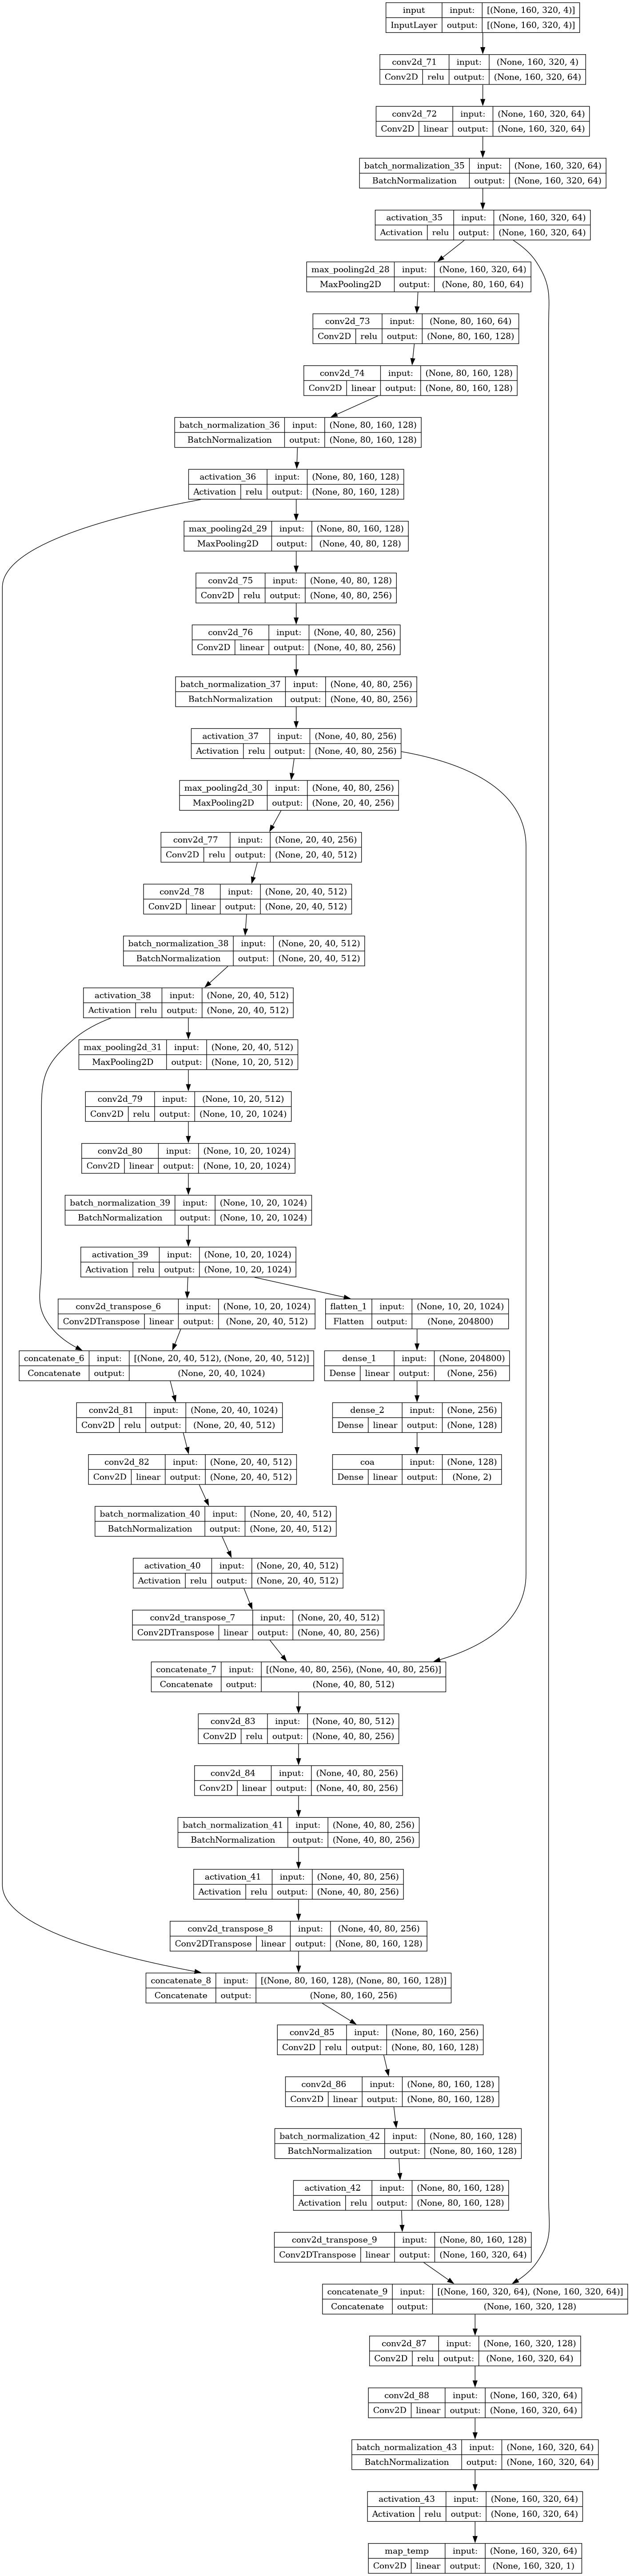

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [31]:
!pwd

/glade/work/griverat/ics637_project
